In [1]:
# Import all needed libraries
from sklearn import linear_model #scikit learn linear_model
import pandas as pd              #Pandas
import matplotlib.pyplot as plt  #Matplotlib
import numpy as np               #Numpy
import math                      #Math
from scipy import stats as st    #Scipy stats

In [2]:
# Read the raw train and test files
df_train_ = pd.read_csv("C:/Users/Hubert/Desktop/Python Projects/Linear regression Data project/train.csv")

df_test_= pd.read_csv('C:/Users/Hubert/Desktop/Python Projects/Linear regression Data project/test.csv')

In [3]:
# Clean data by dropping dodgy data
df_train = df_train_.dropna()
df_test = df_test_.dropna()

In [4]:
#compare before and after for train data .dropna()
#.dropna() drop out nan data

print("Before train.csv has", df_train_.shape[0],"rows and",df_train_.shape[1], "columns\n")

print("After train.csv has", df_train.shape[0],"rows and",df_train.shape[1], "columns")

Before train.csv has 700 rows and 2 columns

After train.csv has 699 rows and 2 columns


In [5]:
# Print out 0 to 5 index train data for x and y separately
print(df_train.loc[:5,'x'],'\n')

print(df_train.loc[:5,'y'])


0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
5    36.0
Name: x, dtype: float64 

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
Name: y, dtype: float64


In [6]:
df_train_y = df_train.loc[:,'y'].to_numpy().reshape(-1,1) # to_numpy() converts it into numpy array
df_train_x = df_train.loc[:,'x'].to_numpy().reshape(-1,1) # -1 means calculate the dimension of rows, but with 1 columns

df_test_y = df_test.loc[:,'y'].to_numpy().reshape(-1,1)
df_test_x = df_test.loc[:,'x'].to_numpy().reshape(-1,1)

In [7]:
# Check if the data is skewed
# using numpy stats function
print('Mean of x train data:',np.mean(df_train_x),'\n')
print('Median of x train data:',np.median(df_train_x),'\n')
print('Mean of y train data:',np.mean(df_train_y),'\n')
print('Median of y train data:',np.median(df_train_y),'\n')
print('Std Dev of x train data:',np.std(df_train_x),'\n')
print('Std Dev of y train data:',np.std(df_train_y),'\n')

Mean of x train data: 50.01430615164521 

Median of x train data: 49.0 

Mean of y train data: 49.939869170457804 

Median of y train data: 48.97302037 

Std Dev of x train data: 28.933841385275375 

Std Dev of y train data: 29.08838760426971 



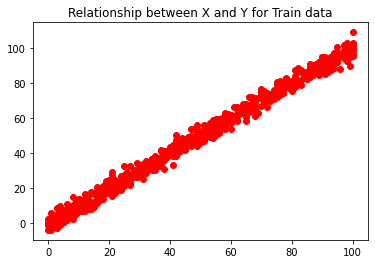

In [8]:
# Ploting some of the data using scatter plot with Matplotlib
plt.title ('Relationship between X and Y for Train data')
plt.scatter(df_train_x,df_train_y, color ='red')
plt.show()

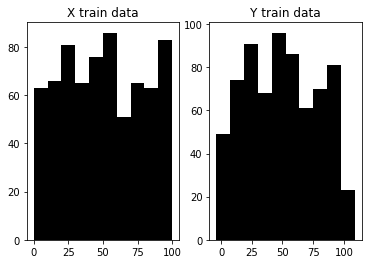

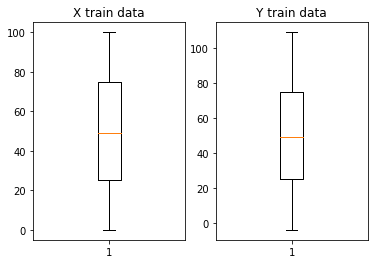

In [9]:
# Using Subplot to have graphs side by side
plt.subplot(1,2,1)
plt.title('X train data')
plt.hist(df_train_x, color='black')

plt.subplot(1,2,2)
plt.title('Y train data')
plt.hist(df_train_y, color='black')
plt.show()

plt.subplot(1,2,1)
plt.title('X train data')
plt.boxplot(df_train_x)

plt.subplot(1,2,2)
plt.title('Y train data')
plt.boxplot(df_train_y)
plt.show()


In [10]:
# Set up the linear regression model
# Create linear regression object
# for linear regression x,y must be in reshape into one column numpy

lm = linear_model.LinearRegression()

lm.fit(df_train_x,df_train_y)

R_sq = lm.score(df_train_x,df_train_y) #lm.score compute R square

# R squared/Coefficient of determination percentage
print(f'\nR Square: {R_sq*100}%\n')

# Correlation percentage
print(f'Correlation: {math.sqrt(R_sq)*100}%\n')



R Square: 99.07015319025518%

Correlation: 99.53399077212526%



In [11]:
# The coefficient for single feature
print(f'Coefficient of X {lm.coef_}')

# Standard error
print(f'Standard Error: {st.sem(df_train_x)}')

#t test 
Ttest = lm.coef_/st.sem(df_train_x)
print(f'The t-statistic: {Ttest}')

# Two tailed p-values
print(f'Two tailed p-values: ')
st.pearsonr(df_train.loc[:,'x'],df_train.loc[:,'y']) 

####df_train.loc[:,'x'] is in panda df
####df_train.loc[:,'x'].to_numpy().reshape(-1,1) is in numpy array
#######st.pearsonr must be ran in panda df not in numpy array because the lib will convert itself

Coefficient of X [[1.00065638]]
Standard Error: [1.09516205]
The t-statistic: [[0.91370623]]
Two tailed p-values: 


(0.9953399077212522, 0.0)

In [12]:
# F-statistic
TSS = df_train_y
TSS = [i**2 for i in TSS] #Using list comprehension to square each element
tss = np.sum(TSS) # Sum all the square values

# Calculates the residual sum of squares
y_predicted = lm.predict(df_train_x) # Predicted values of Y

y_variance = df_train_y - y_predicted # These are the residual between actual y and predicted y

y_variance = [i**2 for i in y_variance] # Using list comprehension to square each element

RSS = np.sum(y_variance)


#F-statistic formula
#= ((TSS-RSS)/p) / (RSS/(n-p-1)) becomes
# (TSS-RSS)/(RSS/ (n-2))

#F_stat = (TSS-RSS)/(RSS/(np.size(y_predicted)-2))
#print (f'The F-statistic is: {F_stat}')

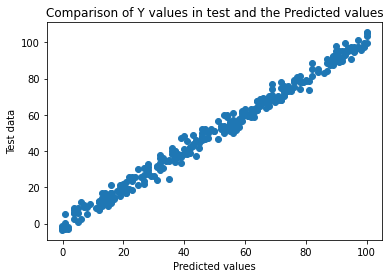

In [13]:
# Using the test data to predict y
y_predicted = lm.predict(df_test_x)

# Create scatter plot of predicted and tested y values
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test data')
plt.xlabel('Predicted values')
plt.scatter(y_predicted,df_test_y)
plt.show()